<a href="https://colab.research.google.com/github/diperezbgit/IA-FUNDAMENTALS/blob/main/TAREA_2/TAREA_2_HC_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HC con plot

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

### ALGORITMO PERSONALIZADO

In [12]:
def fitness(sol,TSP):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]
  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

def hill_climbing(num_cnx,positions,TSP):
  # step 1: Solucion inicial
  current_solution = np.array(range(num_cnx))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=lambda sol: fitness(sol, TSP))

    print("fitness current_solution", fitness(current_solution,TSP))

    print("fitness best_neighbor", fitness(best_neighbor,TSP))

    if fitness(best_neighbor,TSP) < fitness(current_solution,TSP):
      current_solution = best_neighbor
    else:
      return current_solution

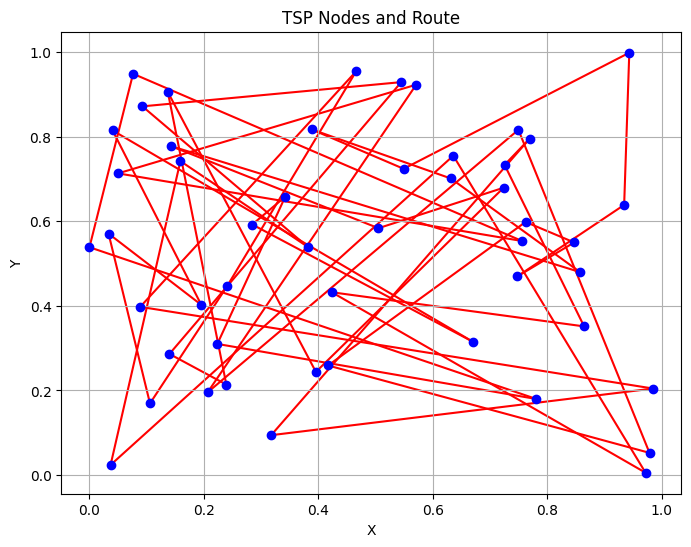

Iteration...
fitness current_solution 25.115889096087667
fitness best_neighbor 23.049772240095372
Iteration...
fitness current_solution 23.049772240095372
fitness best_neighbor 21.36893295799817
Iteration...
fitness current_solution 21.36893295799817
fitness best_neighbor 19.712891942799324
Iteration...
fitness current_solution 19.712891942799324
fitness best_neighbor 18.434915714266054
Iteration...
fitness current_solution 18.434915714266054
fitness best_neighbor 17.276667448672114
Iteration...
fitness current_solution 17.276667448672114
fitness best_neighbor 16.242619688787347
Iteration...
fitness current_solution 16.242619688787347
fitness best_neighbor 15.29479374123074
Iteration...
fitness current_solution 15.29479374123074
fitness best_neighbor 14.8718305504031
Iteration...
fitness current_solution 14.8718305504031
fitness best_neighbor 14.202142055438276
Iteration...
fitness current_solution 14.202142055438276
fitness best_neighbor 13.787727804791887
Iteration...
fitness current

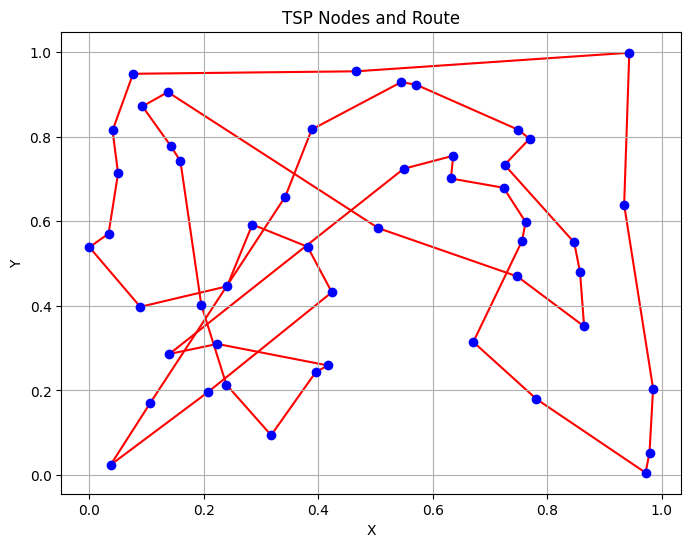


 'good' solution: [23 16 13 22  5 46  0 49  2 28 15 36 38 17 25 12 14 29 18 21 43 32 40 47
 27 48 34  4  6 39  8 11 45 20  9  1 41 37 26 33 30 31 42  3 44 24  7 10
 19 35]


In [18]:
N = 50 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
TSP = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades
"""
current_solution = np.array(range(10)) # crea array de 0 a 9
np.random.shuffle(current_solution) # permuta aleatoriamente el array
"""
solution = hill_climbing(N,positions,TSP)
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)




In [22]:
print(TSP)

[[0.         0.24923256 0.4315365  ... 0.27375591 0.69734091 0.17421519]
 [0.24923256 0.         0.48810302 ... 0.43637017 0.93860069 0.30970434]
 [0.4315365  0.48810302 0.         ... 0.69478139 0.93509797 0.25841585]
 ...
 [0.27375591 0.43637017 0.69478139 ... 0.         0.56228945 0.43764429]
 [0.69734091 0.93860069 0.93509797 ... 0.56228945 0.         0.76027793]
 [0.17421519 0.30970434 0.25841585 ... 0.43764429 0.76027793 0.        ]]
